In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/COURSES/Python for Machine Learning & Data Science Masterclass/1 - Introduction to Course/DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df['Signal']=df['Rebound Signal Strength nHz']

In [8]:
df=df.drop('Rebound Signal Strength nHz',axis=1)

In [9]:
df['Density']=df['Rock Density kg/m3']
df=df.drop('Rock Density kg/m3',axis=1)

In [10]:
df

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [18]:
X=df['Signal'].values.reshape(-1, 1)

In [19]:
y=df['Density']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

## Linear Regression

In [23]:
lr_model=LinearRegression()

In [24]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [31]:
preds=lr_model.predict(X_test)

In [26]:
y_test #look at the deviation

176    2.179775
250    2.621238
12     2.231671
16     2.320837
258    1.908089
281    1.789537
226    2.263986
284    2.148269
147    2.496735
228    2.442191
235    1.897325
123    1.923440
221    2.266713
270    2.192791
78     2.415050
89     2.661302
4      2.452374
143    2.656490
19     2.343174
259    2.360571
200    2.261214
41     2.038879
208    2.543720
15     2.545491
153    2.300750
285    2.359919
169    1.999187
265    1.658609
13     2.431704
212    2.300320
Name: Density, dtype: float64

<Axes: xlabel='Signal', ylabel='Density'>

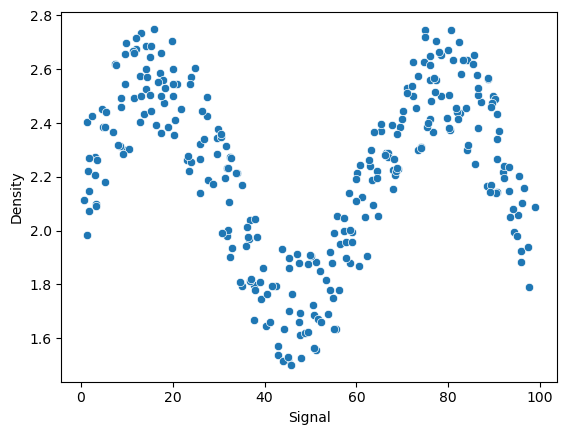

In [29]:
sns.scatterplot(data=df,x=df['Signal'],y=df['Density'])

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [32]:
mean_absolute_error(preds,y_test)

0.211198973318633

In [33]:
np.sqrt(mean_squared_error(preds,y_test))

0.2570051996584629

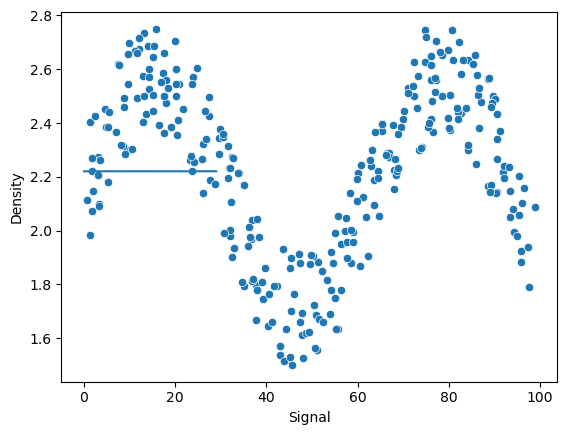

In [45]:
sns.scatterplot(data=df,x=df['Signal'],y=df['Density'])
signal_range=np.arange(0,100).reshape(-1,1)
plt.plot(preds)


In [42]:
signal_preds=lr_model.predict(signal_range.reshape(-1,1))

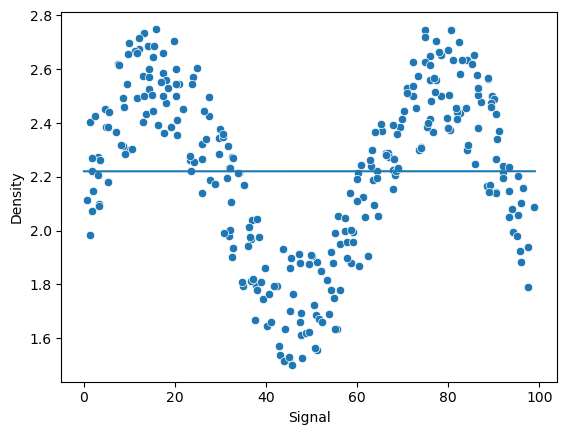

In [46]:
sns.scatterplot(data=df,x=df['Signal'],y=df['Density'])
signal_range=np.arange(0,100).reshape(-1,1)
plt.plot(signal_range,signal_preds)
#linear regression is not fit on this

In [47]:
from sklearn.pipeline import make_pipeline

## Polynomial Regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
pipe=make_pipeline(PolynomialFeatures(25),LinearRegression())

In [66]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=25)),
                ('linearregression', LinearRegression())])

In [67]:
pipe.predict(X_test)

array([2.12534424, 2.49748734, 2.12534477, 2.12534425, 2.12712026,
       1.95175004, 2.18306068, 2.12534424, 2.12534427, 2.12534424,
       2.1429379 , 2.02389695, 2.28317714, 2.15555282, 2.58184645,
       2.12534424, 2.12534424, 2.12534424, 2.12534438, 2.1253445 ,
       2.12534424, 2.12535297, 2.12534424, 2.12534424, 2.18830488,
       2.29772718, 2.14129159, 2.1292883 , 2.28804827, 2.53786201])

In [68]:
def run_model(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    
    preds=model.predict(X_test)
    #metrics
    mae=mean_absolute_error(preds,y_test)
    rmse=np.sqrt(mean_squared_error(preds,y_test))
    
    print(f"MAE : {mae}")
    print(f"RMSE : {rmse}")
    
    sns.scatterplot(data=df,x=df['Signal'],y=df['Density'])
    signal_range=np.arange(0,100)
    signal_preds=model.predict(signal_range.reshape(-1,1))
    plt.plot(signal_range,signal_preds)
#linear regression is not fit on this
    

MAE : 0.20988580713629582
RMSE : 0.2568582109901668


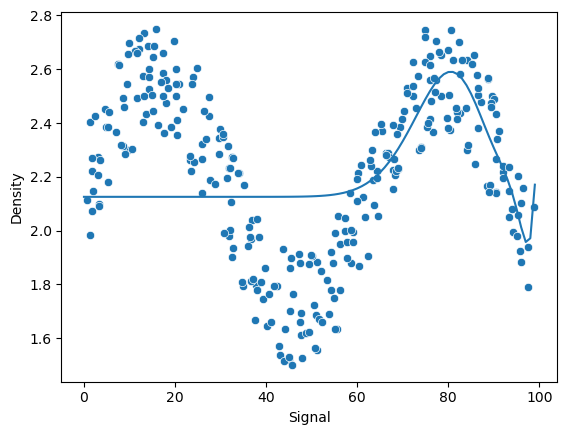

In [69]:
run_model(pipe,X_train, X_test, y_train, y_test)

In [72]:
pipe=make_pipeline(PolynomialFeatures(6),LinearRegression())

MAE : 0.119690915641049
RMSE : 0.13807393264835693


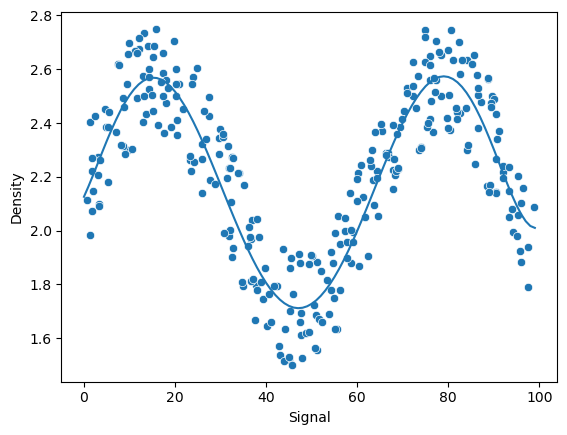

In [73]:
run_model(pipe,X_train, X_test, y_train, y_test)

## KNN Regression

In [75]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442378
RMSE : 0.1523487028635337


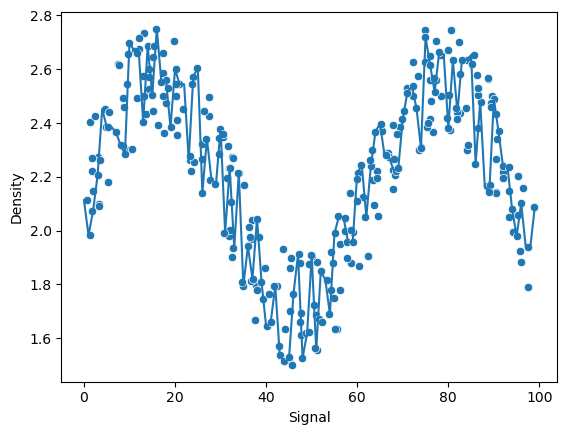

In [83]:
knn_model=KNeighborsRegressor(n_neighbors=1)
run_model(knn_model,X_train, X_test, y_train, y_test)

MAE : 0.12198383614100558
RMSE : 0.13730685016923647


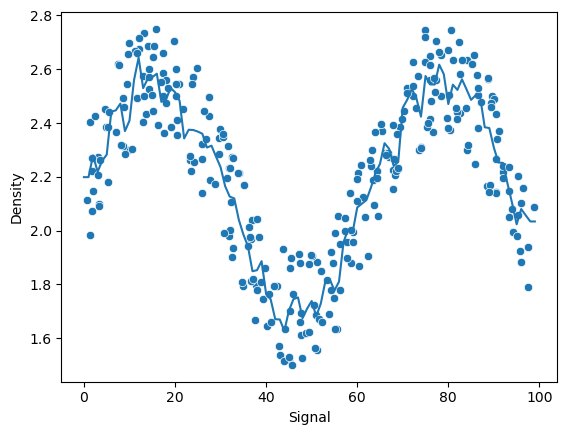

In [84]:
knn_model=KNeighborsRegressor(n_neighbors=5)
run_model(knn_model,X_train, X_test, y_train, y_test)

MAE : 0.11635971693292672
RMSE : 0.13277855732740926


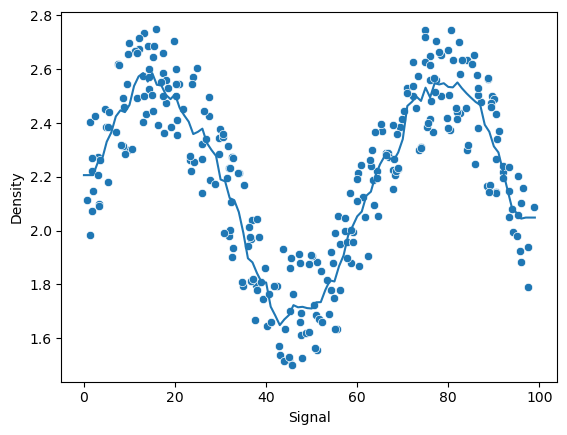

In [85]:
knn_model=KNeighborsRegressor(n_neighbors=10)
run_model(knn_model,X_train, X_test, y_train, y_test)

## SVM Regression

In [86]:
from sklearn.svm import SVR

In [87]:
svr_model=SVR()

In [88]:
param_grid={
    'C':[0.01,0.1,1,5,10,100,1000],
    'gamma':['auto','scale']
}

In [89]:
from sklearn.model_selection import GridSearchCV

In [92]:
gridSVR=GridSearchCV(svr_model,param_grid)

MAE : 0.10854210121348368
RMSE : 0.12646999302046696


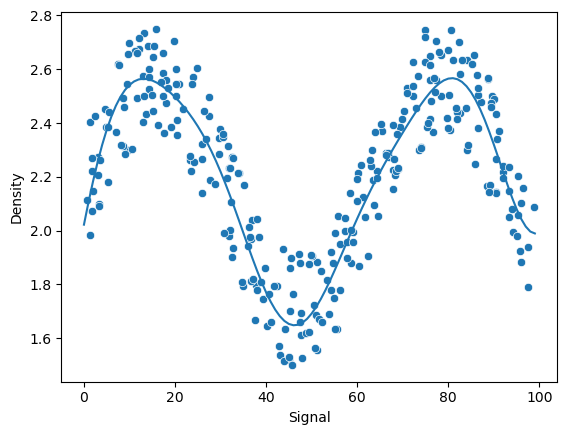

In [93]:
run_model(gridSVR,X_train, X_test, y_train, y_test)

In [94]:
#quite nicely fitting

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
decision_model=DecisionTreeRegressor()

MAE : 0.11877297474442378
RMSE : 0.1523487028635337


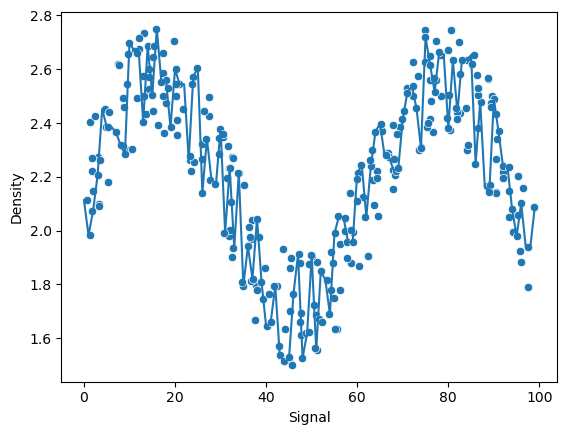

In [97]:
run_model(decision_model,X_train, X_test, y_train, y_test)

In [103]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [100]:
rfr=RandomForestRegressor(n_estimators=10)

MAE : 0.10485818973901316
RMSE : 0.12702098617597116


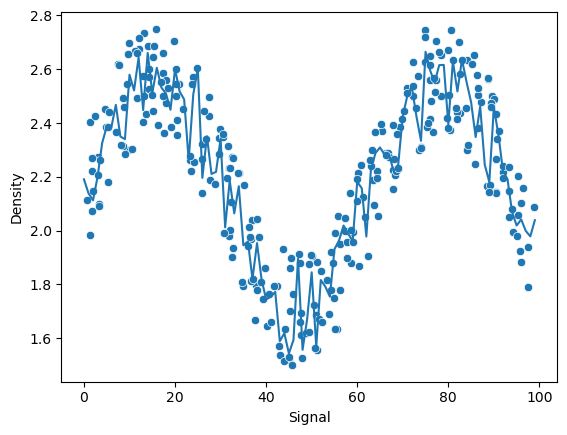

In [102]:
run_model(rfr,X_train, X_test, y_train, y_test)

In [108]:
gbr=GradientBoostingRegressor()

MAE : 0.11318284854800689
RMSE : 0.13294148649584667


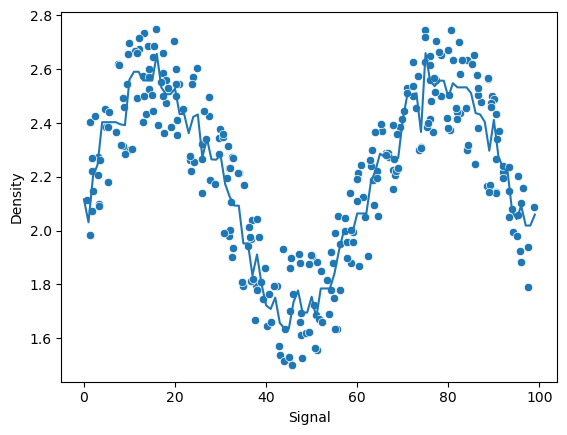

In [109]:
run_model(gbr,X_train, X_test, y_train, y_test)

In [110]:
abr=AdaBoostRegressor()

MAE : 0.11735267790131336
RMSE : 0.13810344310529374


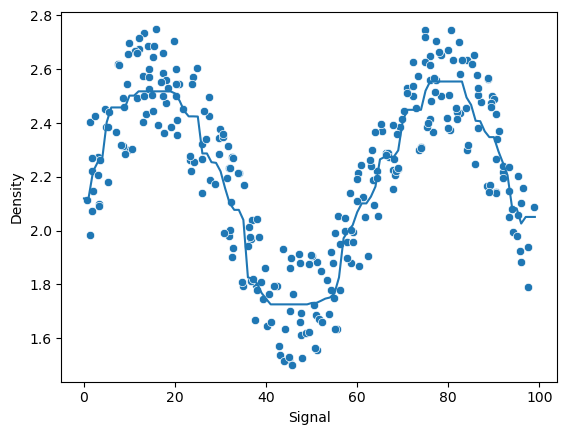

In [111]:
run_model(abr,X_train, X_test, y_train, y_test)